### Libraries to be used

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import precision_score, recall_score, f1_score

### Reading the Data

In [60]:
df = pd.read_csv("Dataset of Diabetes .csv")

### Examining the Data

In [61]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [62]:
df.tail()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y
999,248,24054,M,54,5.0,67,6.9,3.8,1.7,1.1,3.0,0.7,33.0,Y


As we can see, we have 1000 rows(data) that we will work on, also we have two nominal data columns(Gender and Class)

We also have two columns that we won't be using during the trainig phase(ID and No_Pation)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


We have a dataset containing 14 columns and 1000 rows with no missing values. Out of the 14 columns, 12 are numerical and likely won't require encoding, while the remaining 2 are of object type and may need to be encoded.

In [64]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


Let's check for null values

In [65]:
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

No null values

Now let's check for duplicates

In [66]:
duplicates = df.duplicated()
print(duplicates.sum())
df[df.duplicated()]

0


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS


As we can see we don't have any duplicates

Let's drop useless columns, such as id and No_Pation

Instead of dropping data from original dataset, we will use the iloc method and save the data to be used in new variable called df_cleaned, that we will be using from now

In [67]:
df_cleaned = df.iloc[:,2:]
df_cleaned

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


### Encoding

In [68]:
label_Gender = LabelEncoder()
label_Class = LabelEncoder()

Check original unique values before mapping

In [69]:
print("Original unique values in 'Gender':", df_cleaned['Gender'].unique())
print("Original unique values in 'CLASS':", df_cleaned['CLASS'].unique())

Original unique values in 'Gender': ['F' 'M' 'f']
Original unique values in 'CLASS': ['N' 'N ' 'P' 'Y' 'Y ']


As we can see, we have some errors in the data entry, we have 'F' and 'f', we also have 'N' and 'N ', ...etc
all of this need to be fixed before encoding these nominal data


First in 'Gender'; we have females and Males, so we must have encoded values of 'F' and 'M', let's handle this

In [70]:
# remove spaces and convert to upper case
df_cleaned['Gender'] = df_cleaned['Gender'].str.strip().str.upper()

In [71]:
print("Original unique values in 'Gender':", df_cleaned['Gender'].unique())

Original unique values in 'Gender': ['F' 'M']


Now in 'CLASS'; we shall have unique values of Diabetic, Non-Diabetic, or Predict-Diabetic

In [72]:
df_cleaned['CLASS'] = df_cleaned['CLASS'].str.strip().str.upper()

In [73]:
print("Original unique values in 'CLASS':", df_cleaned['CLASS'].unique())

Original unique values in 'CLASS': ['N' 'P' 'Y']


Now let's move on to the next part and encode these values, we shall have encoded values of 0 and 1 in the Gender attribute and 0, 1 and 2 in the CLASS attribute

In [74]:
df_cleaned["Gender"] = label_Gender.fit_transform(df_cleaned["Gender"])
df_cleaned["CLASS"] = label_Class.fit_transform(df_cleaned["CLASS"])

In [75]:
print("Unique values in 'Gender':", df_cleaned['Gender'].unique())
print("Unique values in 'CLASS':", df_cleaned['CLASS'].unique())
print("\nGender mapping:")
for num, cat in enumerate(label_Gender.classes_):
    print(f"{num} -> {cat}")
print("\nClass mapping:")
for num, cat in enumerate(label_Class.classes_):
    print(f"{num} -> {cat}")

Unique values in 'Gender': [0 1]
Unique values in 'CLASS': [0 1 2]

Gender mapping:
0 -> F
1 -> M

Class mapping:
0 -> N
1 -> P
2 -> Y


In [76]:
df_cleaned

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2
998,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2


### Outlier Detection

In [77]:
attributes = ['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS']

In [78]:
numerical_columns = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

We will start by plotting the box plot for each attribute

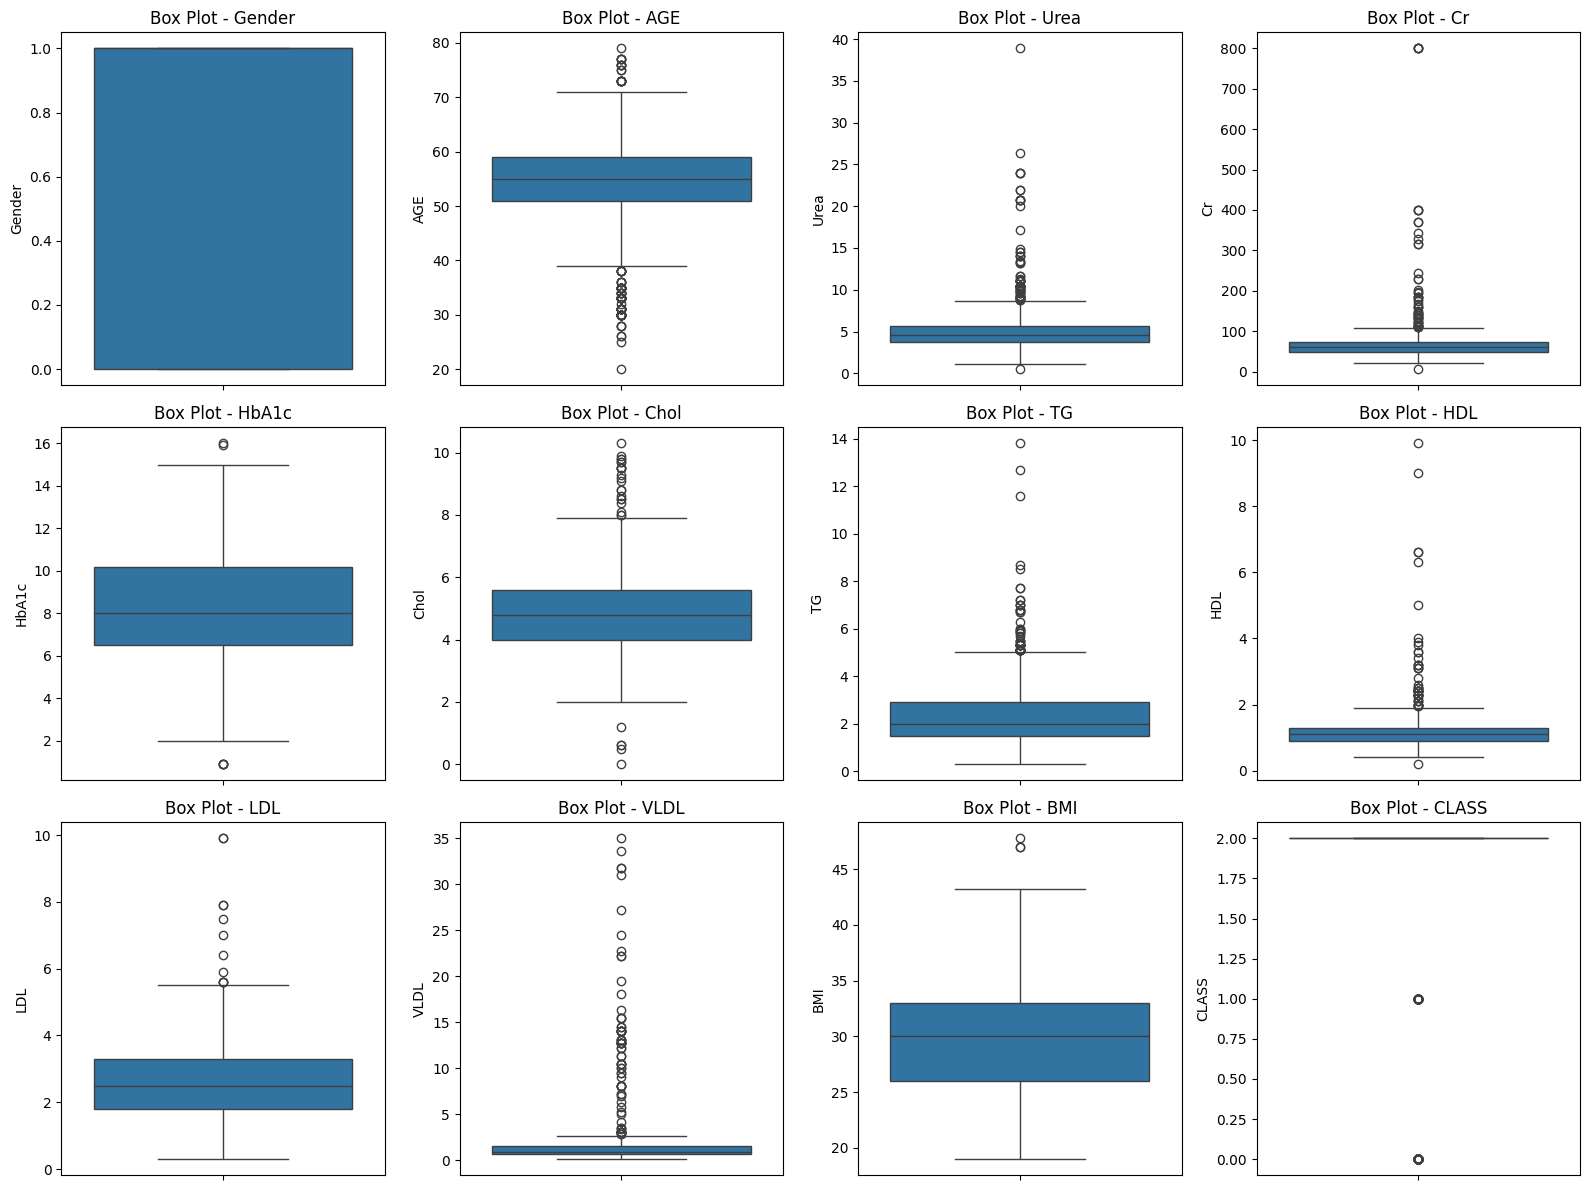

In [79]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(attributes, start=1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box Plot - {col}')

plt.tight_layout()
plt.show()

We won't 'apply' outlier detection on Gender and Class attributes as this is nonsense, outliers only make sense for continuous data as they’re values that are way off the usual range, but Gender (0/1) and CLASS (0/1/2) are categories encoded as numbers, not continuous numbers.

First method: Using IQR and multiple column dependency

In [80]:
def remove_outliers_iqr1(data, columns):
    mask = pd.Series([True] * len(data))
    initial_len = len(data)
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        col_mask = (data[column] >= lower) & (data[column] <= upper)
        removed = (~col_mask).sum()
        print(f"Outliers removed in '{column}': {removed}")
        mask &= col_mask
    final_len = mask.sum()
    print(f"\nTotal rows after outlier removal: {final_len} (removed {initial_len - final_len} rows)")
    return data[mask]

The mask used lets us check all columns at once on the full dataset before removing anything, instead of removing  down the data repeatedly, this way we avoid accidentally removing too many rows as outliers are multidimensional, a row might look like an outlier on column A alone, but if columns B and C values are perfectly normal, we might want to reconsider. 
Filtering column by column and reducing the dataframe after each step can over-filter — throwing out rows that would pass a combined all-columns check.

In [81]:
df_IQR_1 = remove_outliers_iqr1(df_cleaned, numerical_columns)
df_IQR_1

Outliers removed in 'AGE': 98
Outliers removed in 'Urea': 65
Outliers removed in 'Cr': 52
Outliers removed in 'HbA1c': 6
Outliers removed in 'Chol': 27
Outliers removed in 'TG': 55
Outliers removed in 'HDL': 50
Outliers removed in 'LDL': 11
Outliers removed in 'VLDL': 74
Outliers removed in 'BMI': 3

Total rows after outlier removal: 679 (removed 321 rows)


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
5,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
6,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
7,1,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,0
13,0,45,4.6,54,5.1,4.2,1.7,1.2,2.2,0.8,23.0,0
14,0,50,3.5,39,4.0,4.0,1.5,1.2,2.2,0.7,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
989,1,62,6.3,82,6.7,5.3,2.0,1.0,3.5,0.9,30.1,2
990,0,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0,2
991,0,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,2
992,1,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,2


Now let's plot once again

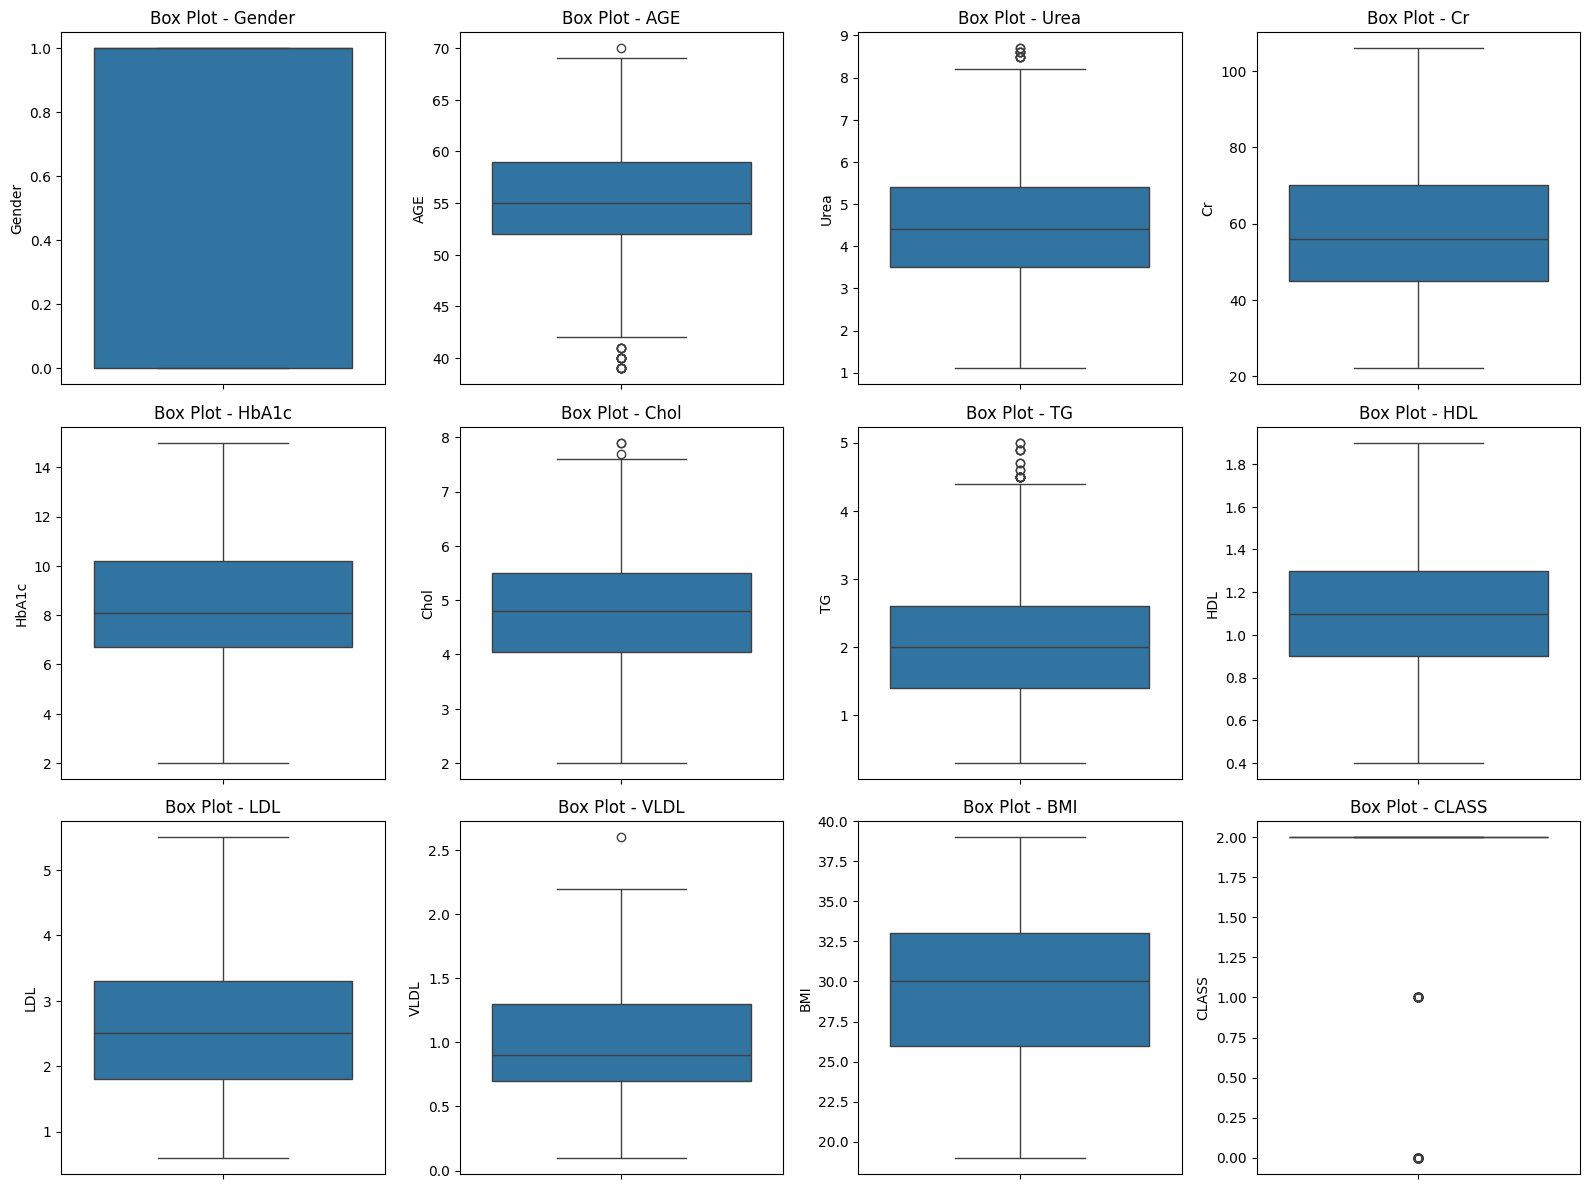

In [82]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(attributes, start=1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df_IQR_1[col])
    plt.title(f'Box Plot - {col}')

plt.tight_layout()
plt.show()

Feature Scaling for df_IQR_1

In [83]:
scaler = MinMaxScaler()

Since CLASS column is holding 0, 1 and 2 values, we will just re-scale them to be in range 0-->1

In [84]:
df_IQR_1[attributes] = scaler.fit_transform(df_IQR_1[attributes])

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_35444\2898708734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IQR_1[attributes] = scaler.fit_transform(df_IQR_1[attributes])


In [85]:
print("\n----- SCALED FEATURES PREVIEW -----")
print(df_IQR_1.head())


----- SCALED FEATURES PREVIEW -----
    Gender       AGE      Urea        Cr     HbA1c      Chol        TG  \
5      0.0  0.193548  0.157895  0.023810  0.153846  0.152542  0.148936   
6      0.0  0.354839  0.118421  0.333333  0.153846  0.271186  0.212766   
7      1.0  0.290323  0.473684  0.297619  0.153846  0.152542  0.106383   
13     0.0  0.193548  0.460526  0.380952  0.238462  0.372881  0.297872   
14     0.0  0.354839  0.315789  0.202381  0.153846  0.338983  0.255319   

         HDL       LDL  VLDL   BMI  CLASS  
5   0.400000  0.183673  0.12  0.10    0.0  
6   0.333333  0.306122  0.20  0.25    0.0  
7   0.333333  0.204082  0.12  0.25    0.0  
13  0.533333  0.326531  0.28  0.20    0.0  
14  0.533333  0.326531  0.24  0.25    0.0  


In [86]:
print("Unique values in 'CLASS':", df_IQR_1['CLASS'].unique())

Unique values in 'CLASS': [0.  0.5 1. ]


Now let's plot once again

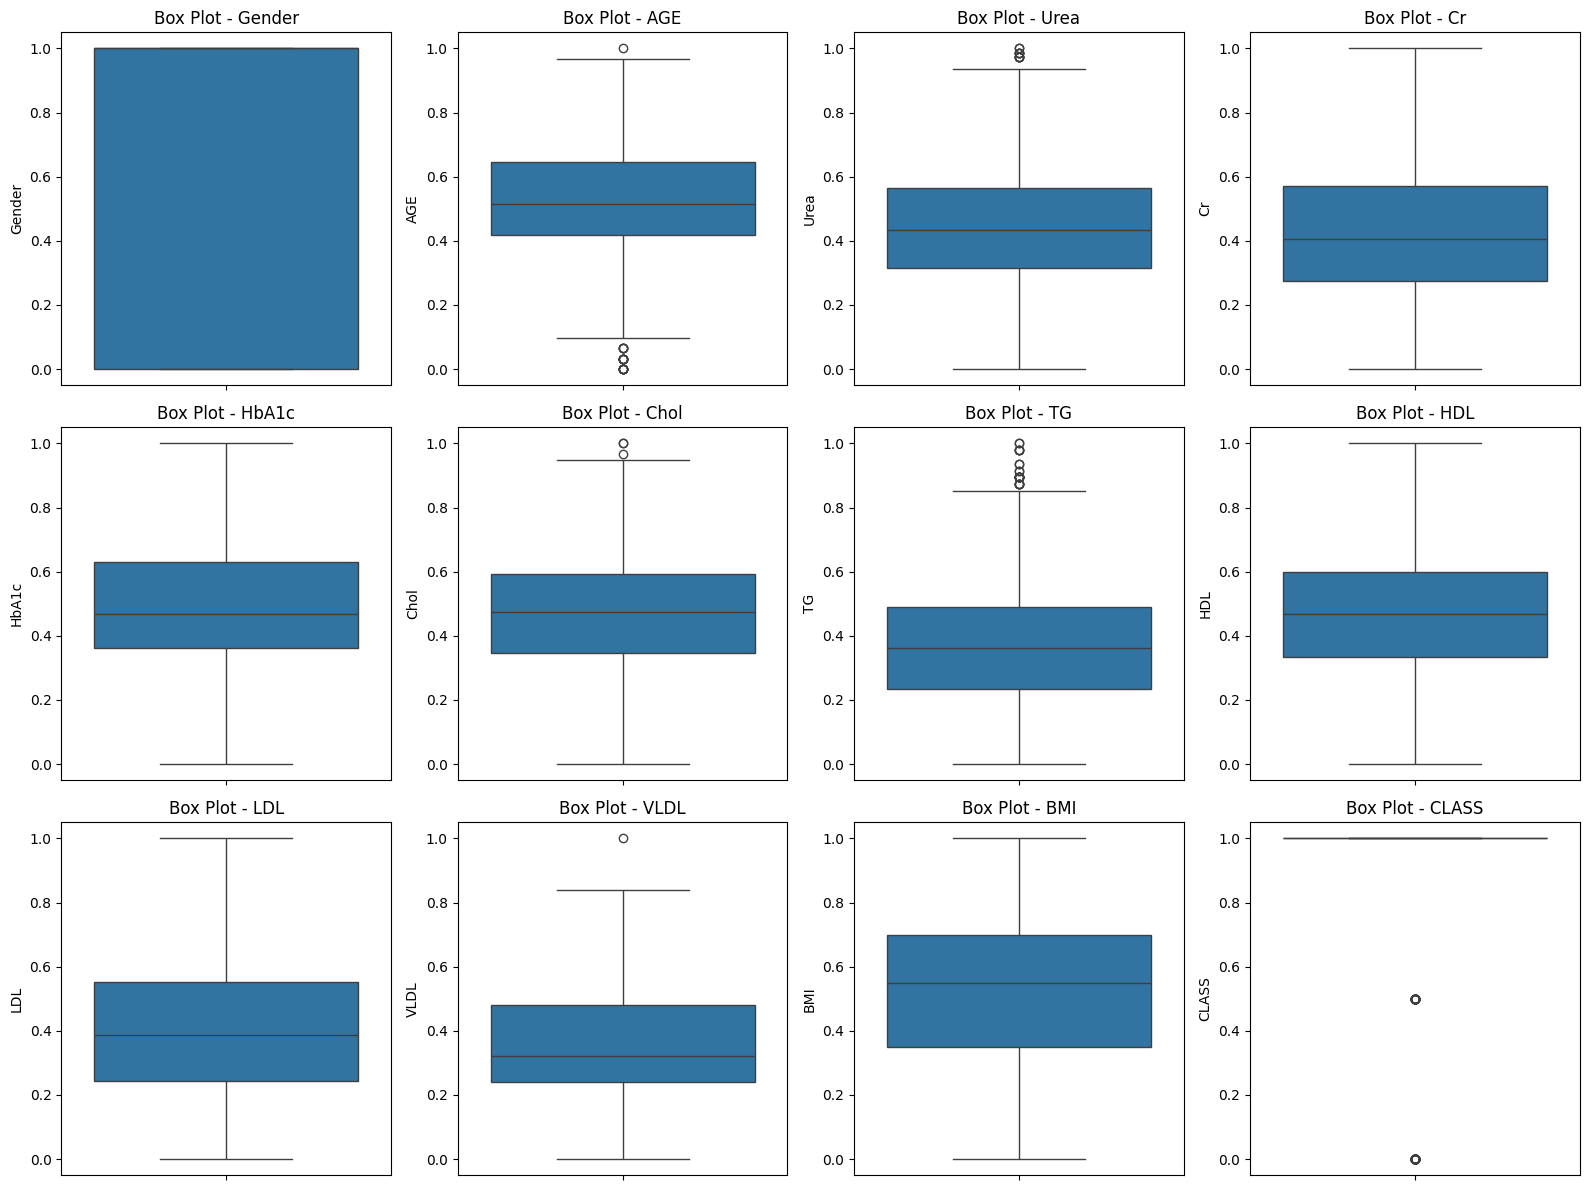

In [87]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(attributes, start=1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df_IQR_1[col])
    plt.title(f'Box Plot - {col}')

plt.tight_layout()
plt.show()

### Testing different outliers data set

Now let's run a simple model and check accuracy

In [88]:
model_for_testing_outliers = LinearRegression()

In [89]:
x = df_IQR_1.drop('CLASS', axis='columns')
x

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
5,0.0,0.193548,0.157895,0.023810,0.153846,0.152542,0.148936,0.400000,0.183673,0.12,0.100
6,0.0,0.354839,0.118421,0.333333,0.153846,0.271186,0.212766,0.333333,0.306122,0.20,0.250
7,1.0,0.290323,0.473684,0.297619,0.153846,0.152542,0.106383,0.333333,0.204082,0.12,0.250
13,0.0,0.193548,0.460526,0.380952,0.238462,0.372881,0.297872,0.533333,0.326531,0.28,0.200
14,0.0,0.354839,0.315789,0.202381,0.153846,0.338983,0.255319,0.533333,0.326531,0.24,0.250
...,...,...,...,...,...,...,...,...,...,...,...
989,1.0,0.741935,0.684211,0.714286,0.361538,0.559322,0.361702,0.400000,0.591837,0.32,0.555
990,0.0,0.580645,0.394737,0.571429,0.561538,0.559322,0.638298,0.400000,0.163265,0.48,0.500
991,0.0,0.516129,0.394737,0.142857,0.915385,0.576271,0.276596,0.800000,0.510204,0.24,0.700
992,1.0,0.516129,0.263158,0.202381,0.500000,0.508475,0.468085,1.000000,0.469388,0.24,0.400


In [90]:
y = df_IQR_1['CLASS']
y

5      0.0
6      0.0
7      0.0
13     0.0
14     0.0
      ... 
989    1.0
990    1.0
991    1.0
992    1.0
999    1.0
Name: CLASS, Length: 679, dtype: float64

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [92]:
model_for_testing_outliers.fit(x_train, y_train)

preds1 = model_for_testing_outliers.predict(x_test)

r2_1 = r2_score(y_test, preds1)
rmse1 = root_mean_squared_error(y_test, preds1)
mae1 = mean_absolute_error(y_test, preds1)

performance1 = {
    "Model for Testing Outliers": {
        "R²": r2_1,
        "RMSE": rmse1,
        "MAE": mae1
    }
}

for model_name, metrics in performance1.items():
    print(f"\n===== {model_name} =====")
    for m, v in metrics.items():
        print(f"{m}: {v:.4f}")


===== Model for Testing Outliers =====
R²: 0.4607
RMSE: 0.2319
MAE: 0.1681


Second method: Using IQR and column independancy

In [93]:
def remove_outliers_iqr2(df, columns):
    initial_len = len(df)
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    final_len = len(df)
    print(f"Rows before removal: {initial_len}")
    print(f"Rows after removal: {final_len}")
    print(f"Total removed: {initial_len - final_len}")
    return df

In [94]:
df_IQR_2 = remove_outliers_iqr2(df_cleaned, numerical_columns)
df_IQR_2

Rows before removal: 1000
Rows after removal: 678
Total removed: 322


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
5,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
6,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
7,1,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,0
13,0,45,4.6,54,5.1,4.2,1.7,1.2,2.2,0.8,23.0,0
14,0,50,3.5,39,4.0,4.0,1.5,1.2,2.2,0.7,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
989,1,62,6.3,82,6.7,5.3,2.0,1.0,3.5,0.9,30.1,2
990,0,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0,2
991,0,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,2
992,1,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,2


Now let's plot once again

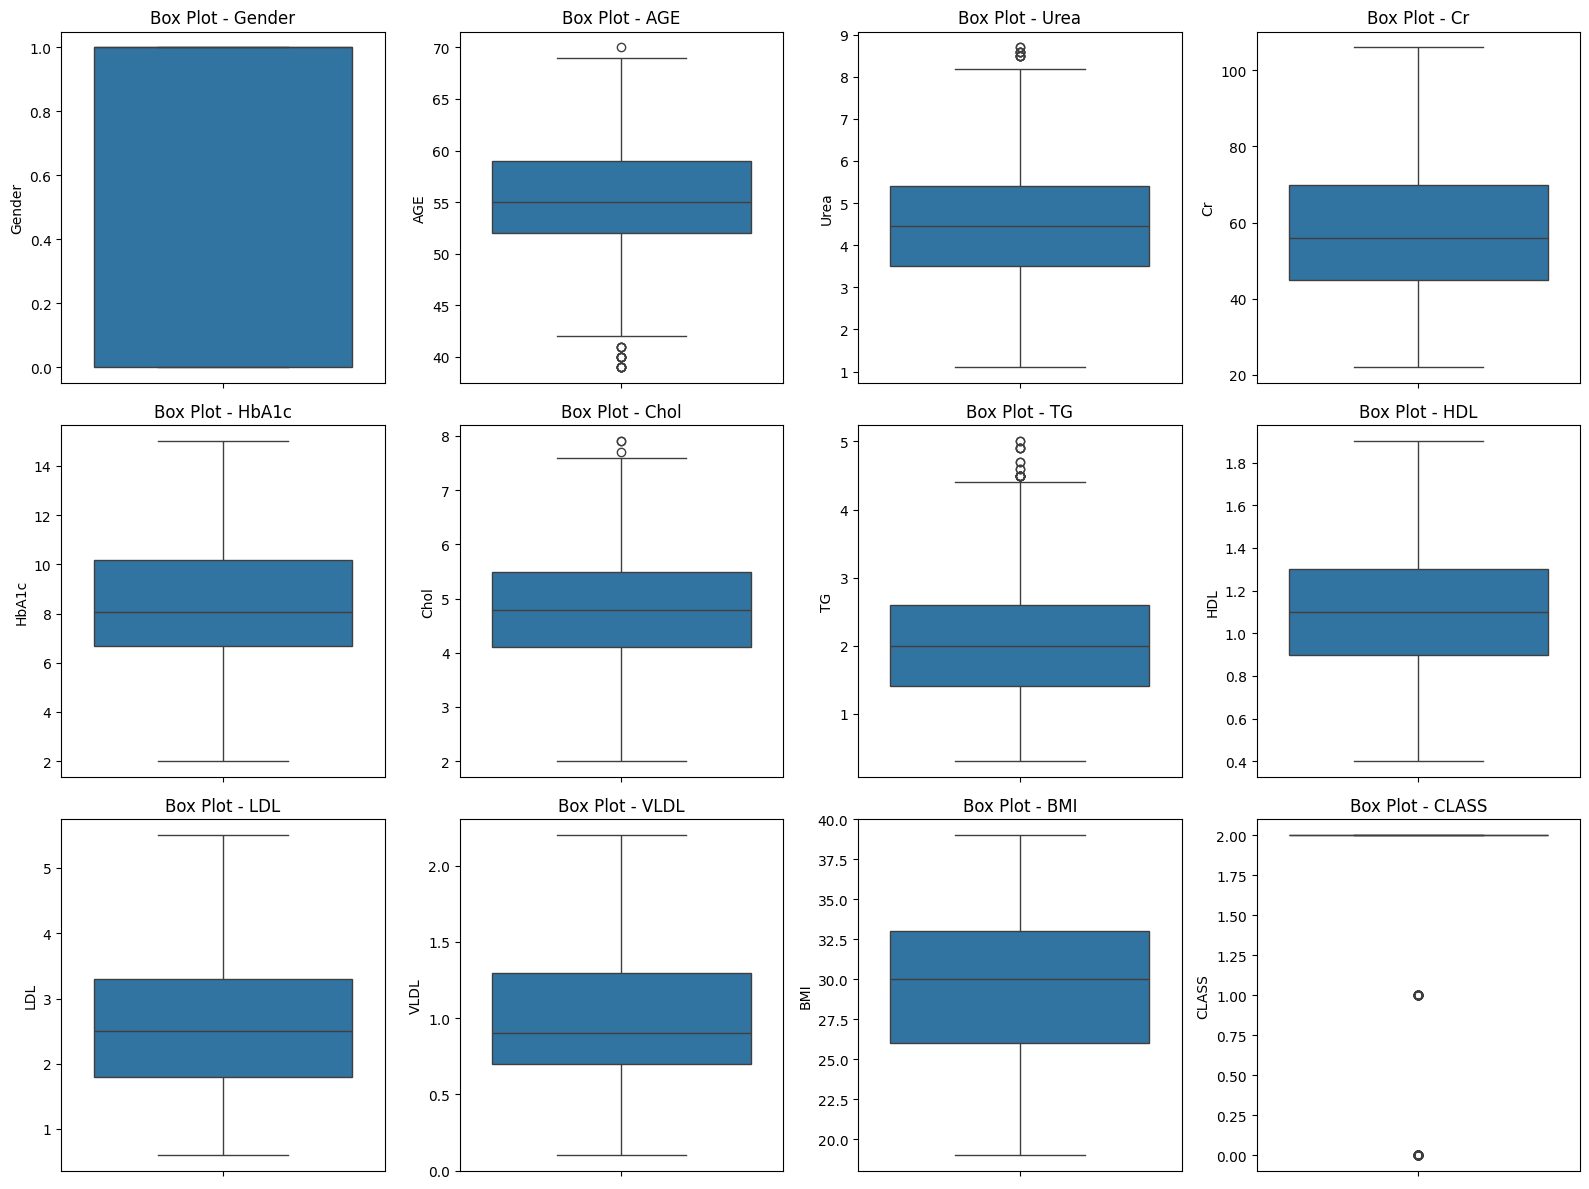

In [95]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(attributes, start=1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df_IQR_2[col])
    plt.title(f'Box Plot - {col}')

plt.tight_layout()
plt.show()

Feature Scaling for df_IQR_2

Since CLASS column is holding 0, 1 and 2 values, we will just re-scale them to be in range 0-->1

In [96]:
df_IQR_2[attributes] = scaler.fit_transform(df_IQR_2[attributes])

In [97]:
print("\n----- SCALED FEATURES PREVIEW -----")
print(df_IQR_2.head())


----- SCALED FEATURES PREVIEW -----
    Gender       AGE      Urea        Cr     HbA1c      Chol        TG  \
5      0.0  0.193548  0.157895  0.023810  0.153846  0.152542  0.148936   
6      0.0  0.354839  0.118421  0.333333  0.153846  0.271186  0.212766   
7      1.0  0.290323  0.473684  0.297619  0.153846  0.152542  0.106383   
13     0.0  0.193548  0.460526  0.380952  0.238462  0.372881  0.297872   
14     0.0  0.354839  0.315789  0.202381  0.153846  0.338983  0.255319   

         HDL       LDL      VLDL   BMI  CLASS  
5   0.400000  0.183673  0.142857  0.10    0.0  
6   0.333333  0.306122  0.238095  0.25    0.0  
7   0.333333  0.204082  0.142857  0.25    0.0  
13  0.533333  0.326531  0.333333  0.20    0.0  
14  0.533333  0.326531  0.285714  0.25    0.0  


In [98]:
print("Unique values in 'CLASS':", df_IQR_2['CLASS'].unique())

Unique values in 'CLASS': [0.  0.5 1. ]


### Testing different outliers data set

Now let's run a simple model and check accuracy

In [99]:
x = df_IQR_2.drop('CLASS', axis='columns')
x

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
5,0.0,0.193548,0.157895,0.023810,0.153846,0.152542,0.148936,0.400000,0.183673,0.142857,0.100
6,0.0,0.354839,0.118421,0.333333,0.153846,0.271186,0.212766,0.333333,0.306122,0.238095,0.250
7,1.0,0.290323,0.473684,0.297619,0.153846,0.152542,0.106383,0.333333,0.204082,0.142857,0.250
13,0.0,0.193548,0.460526,0.380952,0.238462,0.372881,0.297872,0.533333,0.326531,0.333333,0.200
14,0.0,0.354839,0.315789,0.202381,0.153846,0.338983,0.255319,0.533333,0.326531,0.285714,0.250
...,...,...,...,...,...,...,...,...,...,...,...
989,1.0,0.741935,0.684211,0.714286,0.361538,0.559322,0.361702,0.400000,0.591837,0.380952,0.555
990,0.0,0.580645,0.394737,0.571429,0.561538,0.559322,0.638298,0.400000,0.163265,0.571429,0.500
991,0.0,0.516129,0.394737,0.142857,0.915385,0.576271,0.276596,0.800000,0.510204,0.285714,0.700
992,1.0,0.516129,0.263158,0.202381,0.500000,0.508475,0.468085,1.000000,0.469388,0.285714,0.400


In [100]:
y = df_IQR_2['CLASS']
y

5      0.0
6      0.0
7      0.0
13     0.0
14     0.0
      ... 
989    1.0
990    1.0
991    1.0
992    1.0
999    1.0
Name: CLASS, Length: 678, dtype: float64

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [102]:
model_for_testing_outliers.fit(x_train, y_train)

preds2 = model_for_testing_outliers.predict(x_test)

# Metrics
r2_2 = r2_score(y_test, preds2)
rmse2 = root_mean_squared_error(y_test, preds2)
mae2 = mean_absolute_error(y_test, preds2)

performance2 = {
    "Model for Testing Outliers": {
        "R²": r2_2,
        "RMSE": rmse2,
        "MAE": mae2
    }
}

for model_name, metrics in performance2.items():
    print(f"\n===== {model_name} =====")
    for m, v in metrics.items():
        print(f"{m}: {v:.4f}")



===== Model for Testing Outliers =====
R²: 0.4591
RMSE: 0.2322
MAE: 0.1685


Third method: Using DBSCAN

In [103]:
def remove_outliers_dbscan(df, attributes, numerical_columns, eps=1.5, min_samples=5):

    plt.figure(figsize=(16, 12))

    for i, col in enumerate(attributes, start=1):
        plt.subplot(3, 4, i)
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot - {col}')

    plt.tight_layout()
    plt.show()

    # Scale all attributes
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[attributes])

    # Get scaled numerical columns only
    num_indices = [attributes.index(col) for col in numerical_columns]
    X_num_scaled = X_scaled[:, num_indices]

    # Apply DBSCAN on numerical columns
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_num_scaled)

    # Keep only non-outliers
    outlier_mask = labels != -1
    initial_len = len(df)
    final_len = outlier_mask.sum()

    print(f"Rows before removal: {initial_len}")
    print(f"Rows after removal: {final_len}")
    print(f"Total removed: {initial_len - final_len}")

    return df[outlier_mask]


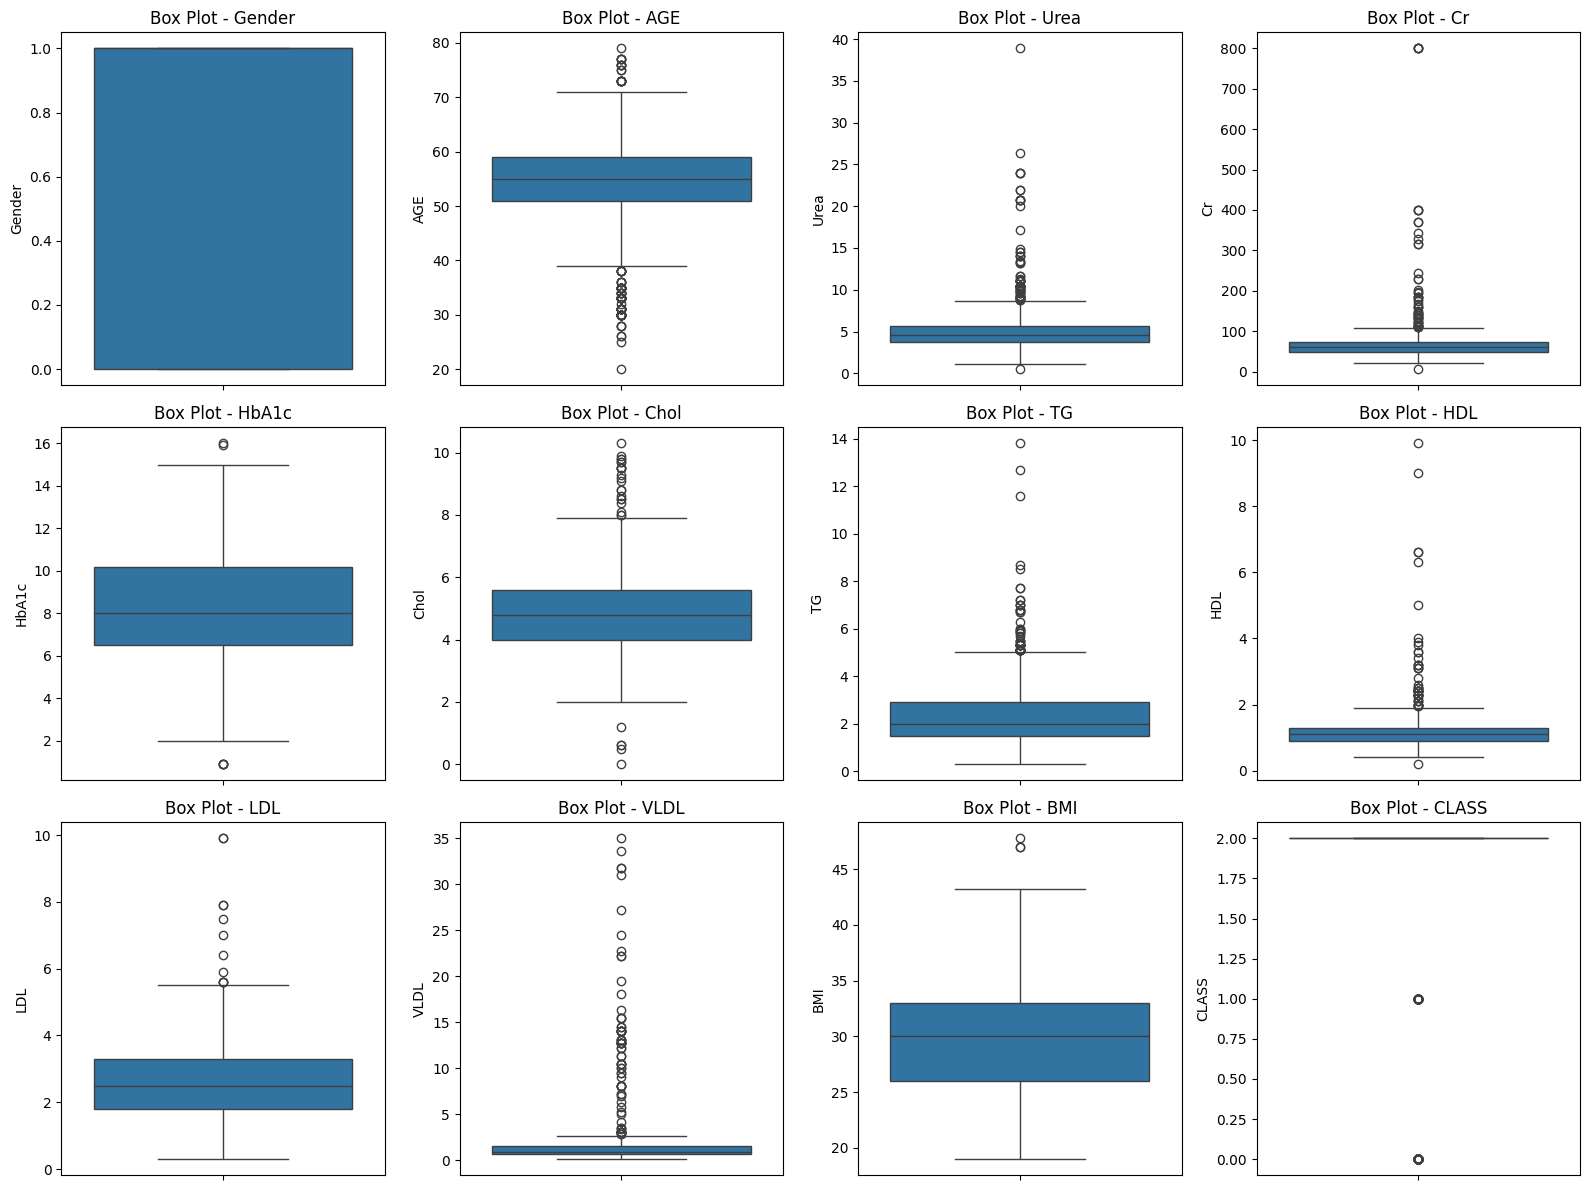

Rows before removal: 1000
Rows after removal: 775
Total removed: 225


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
990,0,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0,2
991,0,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,2
992,1,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,2
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2


In [104]:
df_DBSCAN = remove_outliers_dbscan(df_cleaned, attributes, numerical_columns, eps=1.5, min_samples=5)
df_DBSCAN

Now let's plot once again

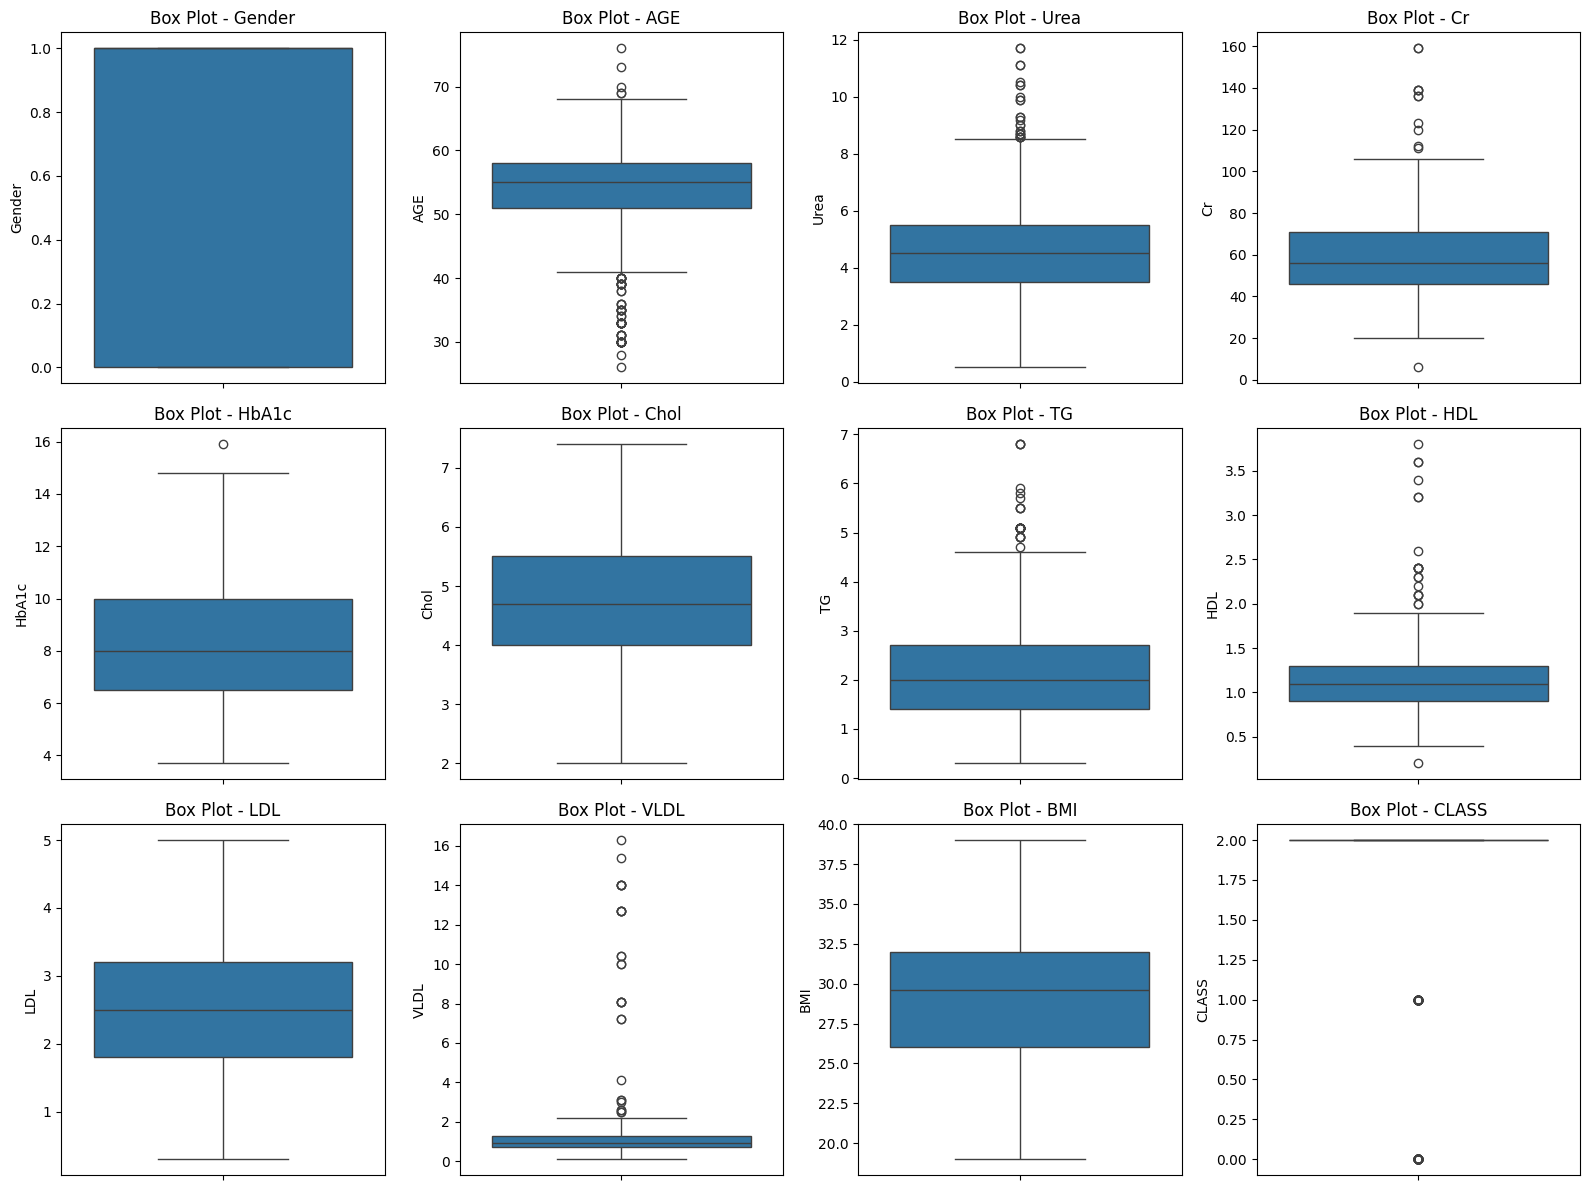

In [105]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(attributes, start=1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df_DBSCAN[col])
    plt.title(f'Box Plot - {col}')

plt.tight_layout()
plt.show()

Feature Scaling for df_DBSCAN

In [106]:
df_DBSCAN[attributes] = scaler.fit_transform(df_DBSCAN[attributes])

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_35444\158006334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DBSCAN[attributes] = scaler.fit_transform(df_DBSCAN[attributes])


In [107]:
print("\n----- SCALED FEATURES PREVIEW -----")
print(df_DBSCAN.head())


----- SCALED FEATURES PREVIEW -----
   Gender   AGE      Urea        Cr     HbA1c      Chol        TG       HDL  \
0     0.0  0.48  0.375000  0.261438  0.098361  0.407407  0.092308  0.611111   
1     1.0  0.00  0.357143  0.366013  0.098361  0.314815  0.169231  0.250000   
2     0.0  0.48  0.375000  0.261438  0.098361  0.407407  0.092308  0.611111   
3     0.0  0.48  0.375000  0.261438  0.098361  0.407407  0.092308  0.611111   
4     1.0  0.14  0.589286  0.261438  0.098361  0.537037  0.107692  0.166667   

        LDL      VLDL   BMI  CLASS  
0  0.234043  0.024691  0.25    0.0  
1  0.382979  0.030864  0.20    0.0  
2  0.234043  0.024691  0.25    0.0  
3  0.234043  0.024691  0.25    0.0  
4  0.361702  0.018519  0.10    0.0  


In [108]:
print("Unique values in 'CLASS':", df_DBSCAN['CLASS'].unique())

Unique values in 'CLASS': [0.  0.5 1. ]


Testing different outliers data set

Now let's run a simple model and check accuracy

In [109]:
x = df_DBSCAN.drop('CLASS', axis='columns')
x

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.0,0.48,0.375000,0.261438,0.098361,0.407407,0.092308,0.611111,0.234043,0.024691,0.25
1,1.0,0.00,0.357143,0.366013,0.098361,0.314815,0.169231,0.250000,0.382979,0.030864,0.20
2,0.0,0.48,0.375000,0.261438,0.098361,0.407407,0.092308,0.611111,0.234043,0.024691,0.25
3,0.0,0.48,0.375000,0.261438,0.098361,0.407407,0.092308,0.611111,0.234043,0.024691,0.25
4,1.0,0.14,0.589286,0.261438,0.098361,0.537037,0.107692,0.166667,0.361702,0.018519,0.10
...,...,...,...,...,...,...,...,...,...,...,...
990,0.0,0.62,0.321429,0.418301,0.459016,0.611111,0.461538,0.222222,0.234043,0.074074,0.50
991,0.0,0.58,0.321429,0.183007,0.836066,0.629630,0.200000,0.388889,0.595745,0.037037,0.70
992,1.0,0.58,0.232143,0.215686,0.393443,0.555556,0.338462,0.472222,0.553191,0.037037,0.40
997,1.0,0.08,0.589286,0.490196,0.245902,0.388889,0.123077,0.277778,0.446809,0.493827,0.42


In [110]:
y = df_DBSCAN['CLASS']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
990    1.0
991    1.0
992    1.0
997    1.0
999    1.0
Name: CLASS, Length: 775, dtype: float64

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [112]:
model_for_testing_outliers.fit(x_train, y_train)

preds3 = model_for_testing_outliers.predict(x_test)

# Metrics
r2_3 = r2_score(y_test, preds3)
rmse3 = root_mean_squared_error(y_test, preds3)
mae3 = mean_absolute_error(y_test, preds3)

performance3 = {
    "Model for Testing Outliers": {
        "R²": r2_3,
        "RMSE": rmse3,
        "MAE": mae3
    }
}

for model_name, metrics in performance3.items():
    print(f"\n===== {model_name} =====")
    for m, v in metrics.items():
        print(f"{m}: {v:.4f}")



===== Model for Testing Outliers =====
R²: 0.5541
RMSE: 0.2178
MAE: 0.1607


Final Check

In [113]:
performance1 = {
    "IQR method 1": {"R2": r2_1, "MAE": mae1, "RMSE": rmse1}
}
performance2 = {
    "IQR method 2": {"R2": r2_2, "MAE": mae2, "RMSE": rmse2}
}
performance3 = {
    "DBSCAN": {"R2": r2_3, "MAE": mae3, "RMSE": rmse3}
}

for performance in (performance1, performance2, performance3):
    for model_name, metrics in performance.items():
        print(f"\n===== {model_name} =====")
        print(f"R² Score: {metrics['R2']:.4f}")
        print(f"Mean Absolute Error (MAE): {metrics['MAE']:.4f}")
        print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.4f}")



===== IQR method 1 =====
R² Score: 0.4607
Mean Absolute Error (MAE): 0.1681
Root Mean Squared Error (RMSE): 0.2319

===== IQR method 2 =====
R² Score: 0.4591
Mean Absolute Error (MAE): 0.1685
Root Mean Squared Error (RMSE): 0.2322

===== DBSCAN =====
R² Score: 0.5541
Mean Absolute Error (MAE): 0.1607
Root Mean Squared Error (RMSE): 0.2178


DBSCAN is the way to go! cleaner errors, better fit, etc.

Based on R2 values;

A higher R² value indicates that the model explains a greater proportion of the variance in the dependent variable, meaning it has stronger explanatory power.
A lower R² value indicates that the model explains less of the variance, implying weaker predictive performance.

### Final Dataset Check

In [114]:
df_cleaned = df_DBSCAN
df_cleaned

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0.0,0.48,0.375000,0.261438,0.098361,0.407407,0.092308,0.611111,0.234043,0.024691,0.25,0.0
1,1.0,0.00,0.357143,0.366013,0.098361,0.314815,0.169231,0.250000,0.382979,0.030864,0.20,0.0
2,0.0,0.48,0.375000,0.261438,0.098361,0.407407,0.092308,0.611111,0.234043,0.024691,0.25,0.0
3,0.0,0.48,0.375000,0.261438,0.098361,0.407407,0.092308,0.611111,0.234043,0.024691,0.25,0.0
4,1.0,0.14,0.589286,0.261438,0.098361,0.537037,0.107692,0.166667,0.361702,0.018519,0.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
990,0.0,0.62,0.321429,0.418301,0.459016,0.611111,0.461538,0.222222,0.234043,0.074074,0.50,1.0
991,0.0,0.58,0.321429,0.183007,0.836066,0.629630,0.200000,0.388889,0.595745,0.037037,0.70,1.0
992,1.0,0.58,0.232143,0.215686,0.393443,0.555556,0.338462,0.472222,0.553191,0.037037,0.40,1.0
997,1.0,0.08,0.589286,0.490196,0.245902,0.388889,0.123077,0.277778,0.446809,0.493827,0.42,1.0


Feature Correlation Heatmap

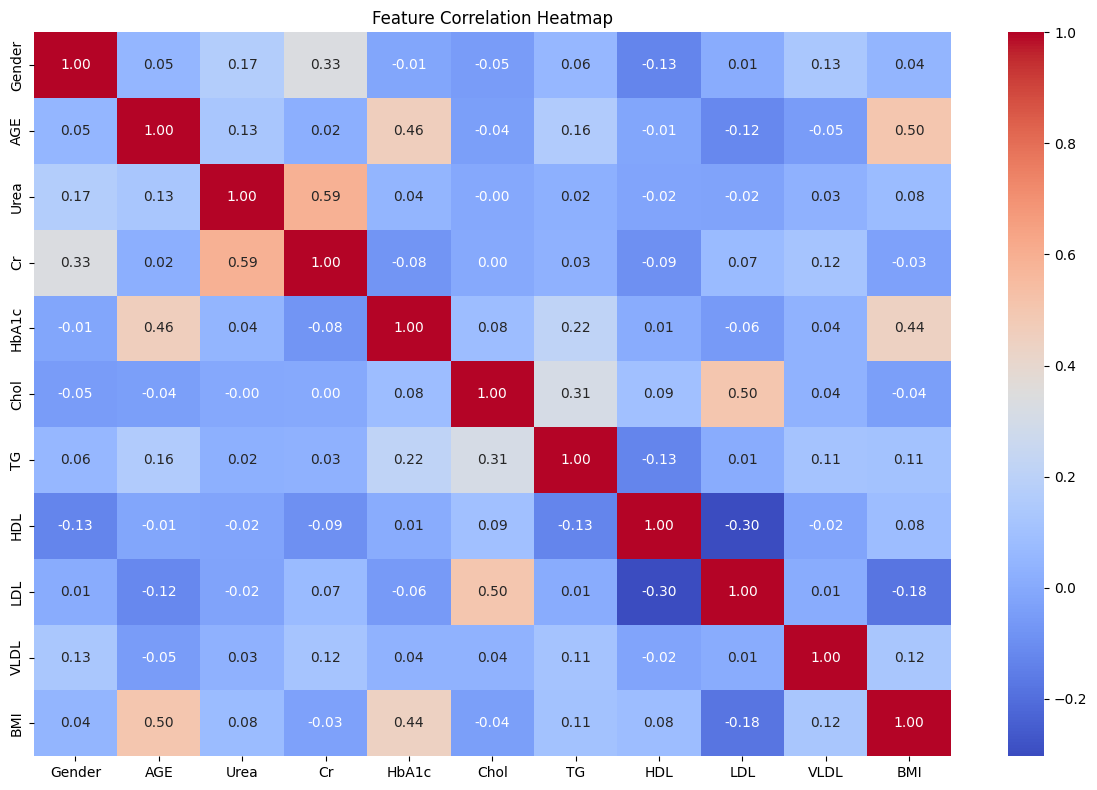

In [115]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.drop('CLASS', axis='columns').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

As we can see, highest correlation is between Urea ans Cr with a value of 0.59, there's also Cholestrol and LDL with a value of 0.50, there's also Age and BMI with a value of 0.50, finally we have HbAlc BMI

### Training Models

### Discrete Model Training

Discrete data

In [116]:
df_cleaned

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0.0,0.48,0.375000,0.261438,0.098361,0.407407,0.092308,0.611111,0.234043,0.024691,0.25,0.0
1,1.0,0.00,0.357143,0.366013,0.098361,0.314815,0.169231,0.250000,0.382979,0.030864,0.20,0.0
2,0.0,0.48,0.375000,0.261438,0.098361,0.407407,0.092308,0.611111,0.234043,0.024691,0.25,0.0
3,0.0,0.48,0.375000,0.261438,0.098361,0.407407,0.092308,0.611111,0.234043,0.024691,0.25,0.0
4,1.0,0.14,0.589286,0.261438,0.098361,0.537037,0.107692,0.166667,0.361702,0.018519,0.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
990,0.0,0.62,0.321429,0.418301,0.459016,0.611111,0.461538,0.222222,0.234043,0.074074,0.50,1.0
991,0.0,0.58,0.321429,0.183007,0.836066,0.629630,0.200000,0.388889,0.595745,0.037037,0.70,1.0
992,1.0,0.58,0.232143,0.215686,0.393443,0.555556,0.338462,0.472222,0.553191,0.037037,0.40,1.0
997,1.0,0.08,0.589286,0.490196,0.245902,0.388889,0.123077,0.277778,0.446809,0.493827,0.42,1.0


We will start by discreting our continuous data, note that we won't do this to class and gender attributes

In [117]:
cols_to_discretize = df_cleaned.columns.drop(["CLASS", "Gender"])
print(cols_to_discretize)

Index(['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL',
       'BMI'],
      dtype='object')


In [118]:
discretizer = KBinsDiscretizer(n_bins=4, encode="ordinal", strategy="quantile")

# Copy DF and discretize only selected columns
df_discrete = df_cleaned.copy()
df_discrete[cols_to_discretize] = discretizer.fit_transform(df_cleaned[cols_to_discretize])

print(df_discrete.head())

   Gender  AGE  Urea   Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  BMI  CLASS
0     0.0  0.0   2.0  1.0    0.0   1.0  0.0  3.0  0.0   0.0  0.0    0.0
1     1.0  0.0   2.0  2.0    0.0   0.0  1.0  2.0  1.0   0.0  0.0    0.0
2     0.0  0.0   2.0  1.0    0.0   1.0  0.0  3.0  0.0   0.0  0.0    0.0
3     0.0  0.0   2.0  1.0    0.0   1.0  0.0  3.0  0.0   0.0  0.0    0.0
4     1.0  0.0   3.0  1.0    0.0   2.0  0.0  0.0  1.0   0.0  0.0    0.0


In [119]:
df_discrete

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0
1,1.0,0.0,2.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0
2,0.0,0.0,2.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0
4,1.0,0.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
990,0.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,0.0,3.0,1.0,1.0
991,0.0,2.0,1.0,0.0,3.0,2.0,1.0,3.0,2.0,1.0,3.0,1.0
992,1.0,2.0,0.0,0.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0
997,1.0,0.0,3.0,3.0,1.0,1.0,0.0,2.0,1.0,3.0,1.0,1.0


In [120]:
x_disc = df_discrete.drop('CLASS', axis='columns')
x_disc

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
1,1.0,0.0,2.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0
2,0.0,0.0,2.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
3,0.0,0.0,2.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
4,1.0,0.0,3.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
990,0.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,0.0,3.0,1.0
991,0.0,2.0,1.0,0.0,3.0,2.0,1.0,3.0,2.0,1.0,3.0
992,1.0,2.0,0.0,0.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0
997,1.0,0.0,3.0,3.0,1.0,1.0,0.0,2.0,1.0,3.0,1.0


In [121]:
y_disc = df_discrete['CLASS']
y_disc.unique()

array([0. , 0.5, 1. ])

Since the values of the target column must be discrete, 0.5 is not a discrete value. we will have to re-scale the range of the target columns from 0, 0.5 and 1 to 0, 1 and 2

In [122]:
y_disc = np.rint(y_disc * 2).astype(int)
y_disc.unique()

array([0, 1, 2])

In [123]:
for col in x_disc.columns:
    print(f"{col}: {df_discrete[col].unique()}")
y_disc.unique()

Gender: [0. 1.]
AGE: [0. 3. 1. 2.]
Urea: [2. 3. 0. 1.]
Cr: [1. 2. 0. 3.]
HbA1c: [0. 1. 3. 2.]
Chol: [1. 0. 2. 3.]
TG: [0. 1. 2. 3.]
HDL: [3. 2. 0. 1.]
LDL: [0. 1. 2. 3.]
VLDL: [0. 2. 1. 3.]
BMI: [0. 3. 1. 2.]


array([0, 1, 2])

Training in a pipeline

In [124]:
x_train_disc, x_test_disc, y_train_disc, y_test_disc = train_test_split(x_disc, y_disc, test_size=0.2, random_state=42)

We will be using Random Forest, Decision Tree and Naive Bayes

In [125]:
models_disc = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

In [126]:
performance_disc = {}
for name, model in models_disc.items():
    model.fit(x_train_disc, y_train_disc)
    preds = model.predict(x_test_disc)
    performance_disc[name] = {
        "Accuracy": accuracy_score(y_test_disc, preds),
        "Report": classification_report(y_test_disc, preds),
        "Confusion Matrix": confusion_matrix(y_test_disc, preds),
        "Predictions": preds
    }

In [127]:
y_pred_rf = performance_disc["Random Forest"]["Predictions"]
y_pred_dt = performance_disc["Decision Tree"]["Predictions"]
y_pred_nb = performance_disc["Naive Bayes"]["Predictions"]

Performance Metrics

In [128]:
for name, metrics in performance_disc.items():
    print(f"\n{name} - Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:\n", metrics["Report"])
    print("Confusion Matrix:\n", metrics["Confusion Matrix"])
    print("--------------------------------------------------")


Random Forest - Accuracy: 0.9097
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.47      0.62        17
           1       0.60      0.55      0.57        11
           2       0.93      1.00      0.97       127

    accuracy                           0.91       155
   macro avg       0.81      0.67      0.72       155
weighted avg       0.91      0.91      0.90       155

Confusion Matrix:
 [[  8   4   5]
 [  1   6   4]
 [  0   0 127]]
--------------------------------------------------

Decision Tree - Accuracy: 0.9226
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.64      0.64      0.64        11
           2       0.96      0.98      0.97       127

    accuracy                           0.92       155
   macro avg       0.80      0.77      0.79       155
weighted avg       0.92      0.92      0.92       155

Confus

Visualize Accuracy

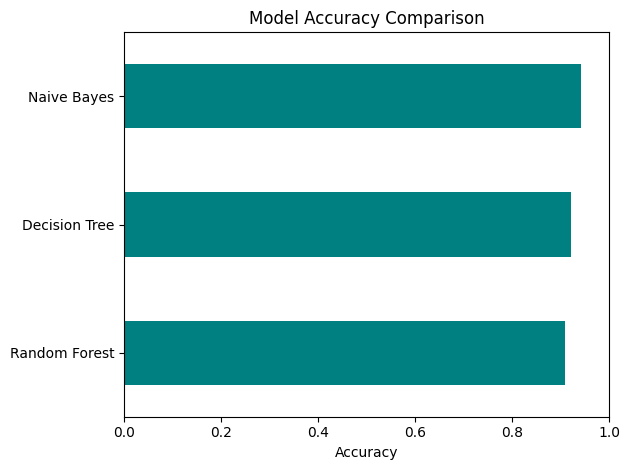

In [129]:
acc_df_disc = pd.DataFrame({name: [metrics["Accuracy"]] for name, metrics in performance_disc.items()}, index=["Accuracy"]).T
acc_df_disc.plot(kind='barh', legend=False, color='teal')
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

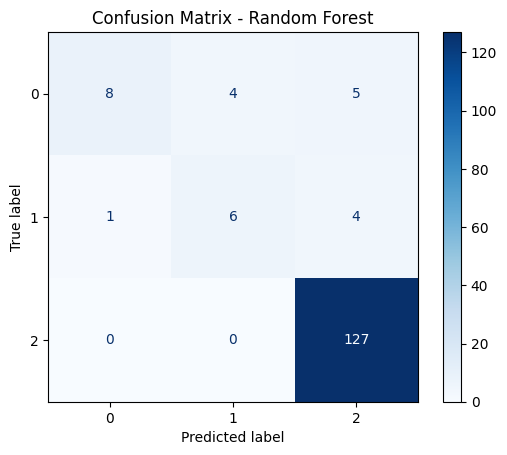

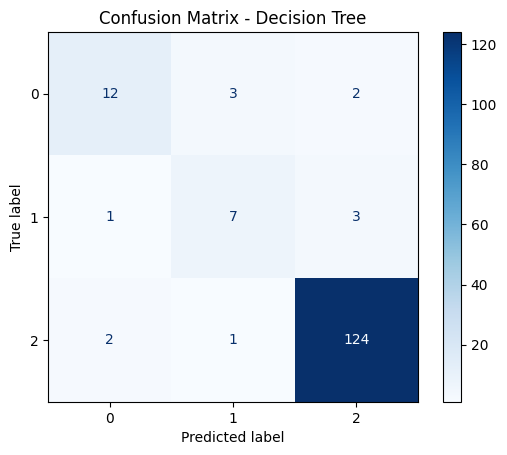

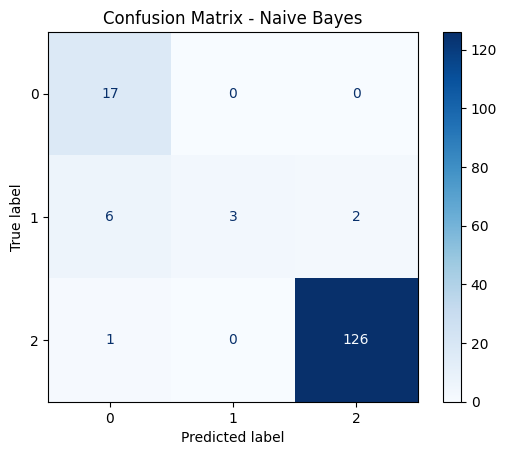

In [130]:
for name, metrics in performance_disc.items():
    cm = metrics["Confusion Matrix"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

Feature Importance for Random Forest

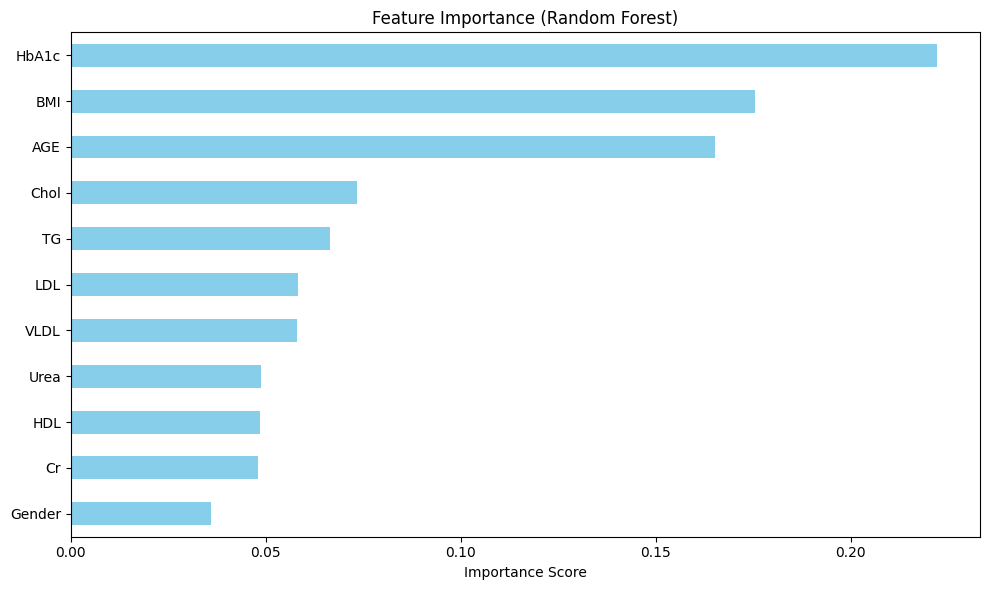

In [131]:
rf_model = RandomForestClassifier()
rf_model.fit(x_disc, y_disc)
importances = pd.Series(rf_model.feature_importances_, index=x.columns)

importances.sort_values().plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

### Continuous Models Training

Continuous data

In [132]:
x_cont = df_cleaned.drop('CLASS', axis='columns')
x_cont

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.0,0.48,0.375000,0.261438,0.098361,0.407407,0.092308,0.611111,0.234043,0.024691,0.25
1,1.0,0.00,0.357143,0.366013,0.098361,0.314815,0.169231,0.250000,0.382979,0.030864,0.20
2,0.0,0.48,0.375000,0.261438,0.098361,0.407407,0.092308,0.611111,0.234043,0.024691,0.25
3,0.0,0.48,0.375000,0.261438,0.098361,0.407407,0.092308,0.611111,0.234043,0.024691,0.25
4,1.0,0.14,0.589286,0.261438,0.098361,0.537037,0.107692,0.166667,0.361702,0.018519,0.10
...,...,...,...,...,...,...,...,...,...,...,...
990,0.0,0.62,0.321429,0.418301,0.459016,0.611111,0.461538,0.222222,0.234043,0.074074,0.50
991,0.0,0.58,0.321429,0.183007,0.836066,0.629630,0.200000,0.388889,0.595745,0.037037,0.70
992,1.0,0.58,0.232143,0.215686,0.393443,0.555556,0.338462,0.472222,0.553191,0.037037,0.40
997,1.0,0.08,0.589286,0.490196,0.245902,0.388889,0.123077,0.277778,0.446809,0.493827,0.42


No need for y_cont as it will be the same as y_disc, so we will directly use y_disc

In [133]:
x_train_cont, x_test_cont, y_train_cont, y_test_cont = train_test_split(x_cont, y_disc, test_size=0.2, random_state=42)

KNN

In [134]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train
knn.fit(x_train_cont, y_train_cont)

# Predict
y_pred_knn = knn.predict(x_test_cont)

# Evaluate
print("Accuracy:", accuracy_score(y_test_cont, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test_cont, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cont, y_pred_knn))

Accuracy: 0.9032258064516129

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73        17
           1       0.43      0.27      0.33        11
           2       0.95      0.98      0.97       127

    accuracy                           0.90       155
   macro avg       0.71      0.65      0.68       155
weighted avg       0.89      0.90      0.89       155


Confusion Matrix:
 [[ 12   3   2]
 [  3   3   5]
 [  1   1 125]]


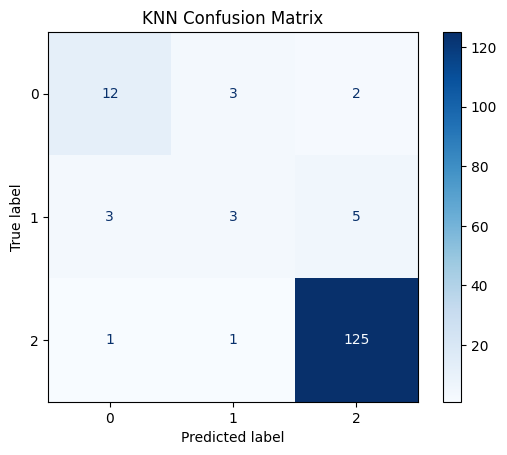

In [135]:
cm_knn = confusion_matrix(y_test_disc, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.show()

Now let's try and check for the best k to use

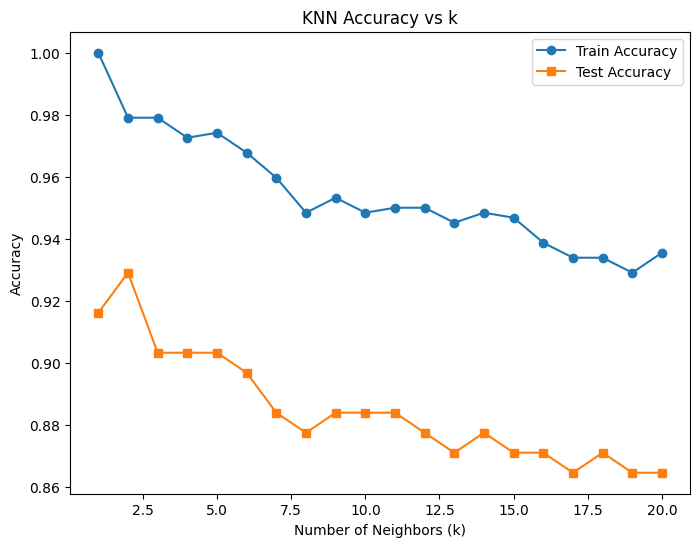

In [136]:
neighbors = range(1, 21)
train_acc = []
test_acc = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_cont, y_train_disc)
    train_acc.append(accuracy_score(y_train_disc, knn.predict(x_train_cont)))
    test_acc.append(accuracy_score(y_test_disc, knn.predict(x_test_cont)))

plt.figure(figsize=(8,6))
plt.plot(neighbors, train_acc, label="Train Accuracy", marker='o')
plt.plot(neighbors, test_acc, label="Test Accuracy", marker='s')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.legend()
plt.show()

As we can see, k=2 performs the best

Now lets train one more time with k = 2

In [137]:
knn_2 = KNeighborsClassifier(n_neighbors=2)

knn_2.fit(x_train_cont, y_train_cont)

y_pred_knn_2 = knn_2.predict(x_test_cont)

print("Accuracy:", accuracy_score(y_test_cont, y_pred_knn_2))
print("\nClassification Report:\n", classification_report(y_test_cont, y_pred_knn_2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cont, y_pred_knn_2))

Accuracy: 0.9290322580645162

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.60      0.55      0.57        11
           2       0.96      0.98      0.97       127

    accuracy                           0.93       155
   macro avg       0.81      0.76      0.79       155
weighted avg       0.93      0.93      0.93       155


Confusion Matrix:
 [[ 13   3   1]
 [  1   6   4]
 [  1   1 125]]


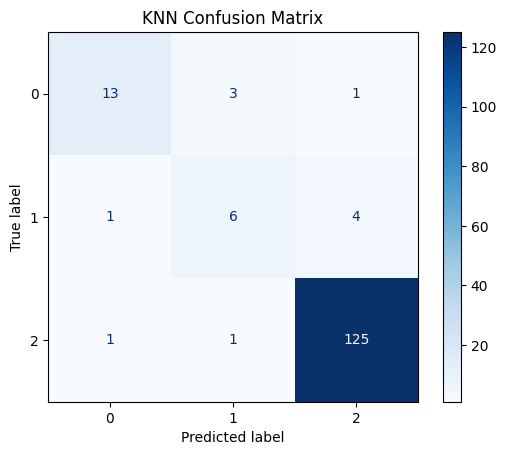

In [138]:
cm_knn_2 = confusion_matrix(y_test_cont, y_pred_knn_2)
disp_knn_2 = ConfusionMatrixDisplay(confusion_matrix=cm_knn_2)
disp_knn_2.plot(cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.show()

Logestic Regression

In [139]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(x_train_cont, y_train_cont)

y_pred_log_reg = log_reg.predict(x_test_cont)

print("Accuracy:", accuracy_score(y_test_cont, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test_cont, y_pred_log_reg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cont, y_pred_log_reg))

Accuracy: 0.8838709677419355

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.59      0.65        17
           1       0.00      0.00      0.00        11
           2       0.91      1.00      0.95       127

    accuracy                           0.88       155
   macro avg       0.54      0.53      0.53       155
weighted avg       0.83      0.88      0.85       155


Confusion Matrix:
 [[ 10   2   5]
 [  4   0   7]
 [  0   0 127]]


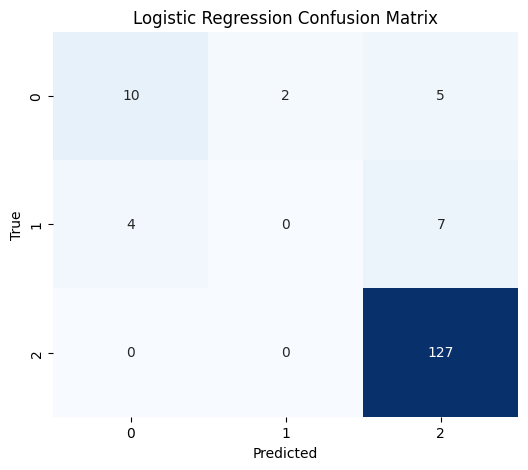

In [140]:
cm_log_reg = confusion_matrix(y_test_cont, y_pred_log_reg)

plt.figure(figsize=(6,5))
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

SVM

SVM Accuracy: 0.8839


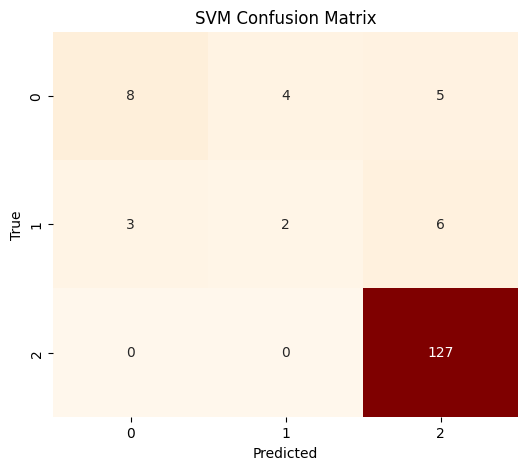

In [141]:
svm_clf = SVC(kernel='rbf', C=1, gamma='scale')

svm_clf.fit(x_train_cont, y_train_cont)

y_pred_svm = svm_clf.predict(x_test_cont)

acc_svm = accuracy_score(y_test_cont, y_pred_svm)
print(f"SVM Accuracy: {acc_svm:.4f}")

cm_svm = confusion_matrix(y_test_cont, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="OrRd", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM Confusion Matrix")
plt.show()


### Models Comparison

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_35444\941750131.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y=acc_df_all.index, data=acc_df_all, palette="viridis")


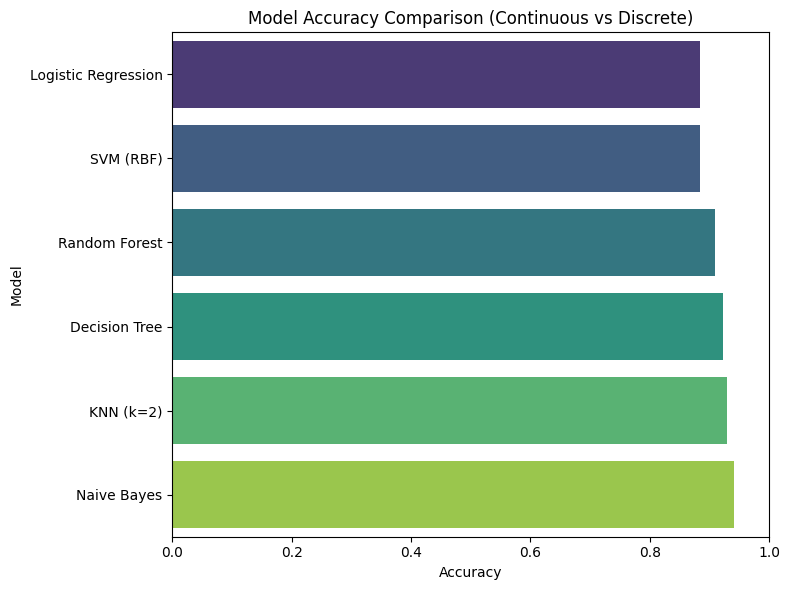

In [ ]:
performance_cont = {
    "KNN (k=2)": accuracy_score(y_test_cont, y_pred_knn_2),
    "Logistic Regression": accuracy_score(y_test_cont, y_pred_log_reg),
    "SVM (RBF)": acc_svm
}

performance_all = {**performance_cont, **{name: metrics["Accuracy"] for name, metrics in performance_disc.items()}}

acc_df_all = pd.DataFrame.from_dict(performance_all, orient="index", columns=["Accuracy"])

acc_df_all = acc_df_all.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(8,6))
sns.barplot(x="Accuracy", y=acc_df_all.index, data=acc_df_all, palette="viridis")
plt.title("Model Accuracy Comparison (Continuous vs Discrete)")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

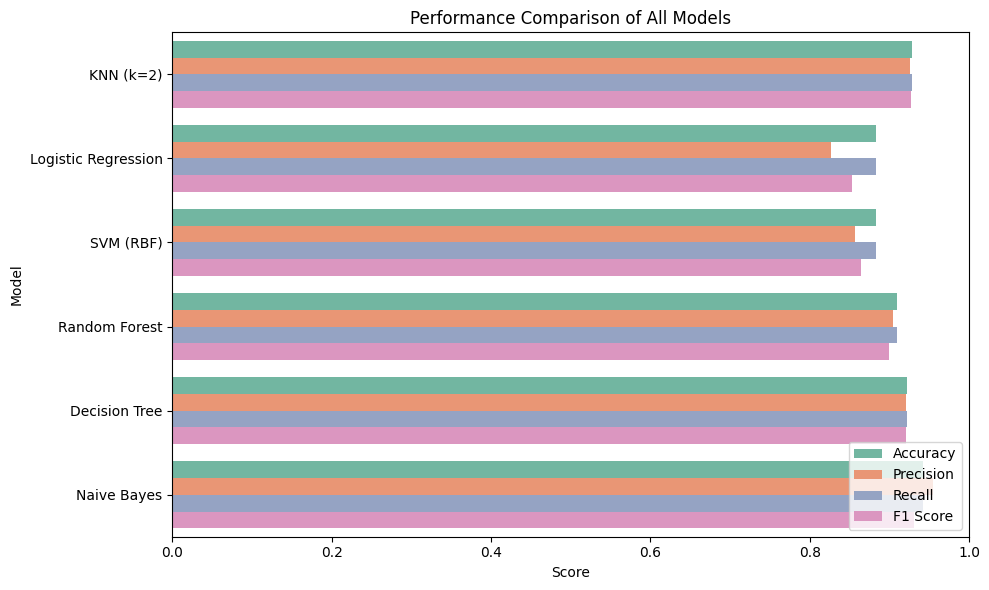

In [ ]:
def get_metrics(y_true, y_pred, name):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_true, y_pred, average="weighted", zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, average="weighted", zero_division=0)
    }

# Continuous models
results = []
results.append(get_metrics(y_test_cont, y_pred_knn_2, "KNN (k=2)"))
results.append(get_metrics(y_test_cont, y_pred_log_reg, "Logistic Regression"))
results.append(get_metrics(y_test_cont, y_pred_svm, "SVM (RBF)"))

# Discrete models
for name, y_pred in zip(["Random Forest", "Decision Tree", "Naive Bayes"], 
                        [y_pred_rf, y_pred_dt, y_pred_nb]):
    results.append(get_metrics(y_test_disc, y_pred, name))


metrics_df = pd.DataFrame(results)

metrics_melted = metrics_df.melt(id_vars="Model", 
                                 value_vars=["Accuracy", "Precision", "Recall", "F1 Score"],
                                 var_name="Metric", value_name="Score")

plt.figure(figsize=(10,6))
sns.barplot(x="Score", y="Model", hue="Metric", data=metrics_melted, palette="Set2")
plt.title("Performance Comparison of All Models")
plt.xlabel("Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Gender VS Class percentage

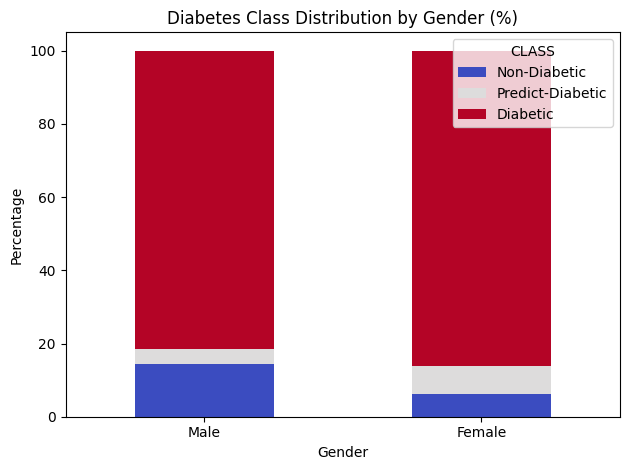

In [144]:
gender_dist = df_cleaned.groupby(['Gender', 'CLASS']).size().unstack().fillna(0)
gender_dist_pct = gender_dist.div(gender_dist.sum(axis=1), axis=0) * 100

gender_dist_pct.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Diabetes Class Distribution by Gender (%)")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.legend(title='CLASS', labels=['Non-Diabetic', 'Predict-Diabetic', 'Diabetic'])
plt.tight_layout()
plt.show()

Age Group vs Diabetes percentage

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_35444\1462657207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeGroup'] = pd.cut(df_cleaned['AGE'], bins=[0, 0.3, 0.6, 1.0], labels=['Young', 'Middle-Aged', 'Older'])
C:\Users\Mohamed\AppData\Local\Temp\ipykernel_35444\1462657207.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dist = df_cleaned.groupby(['AgeGroup', 'CLASS']).size().unstack().fillna(0)


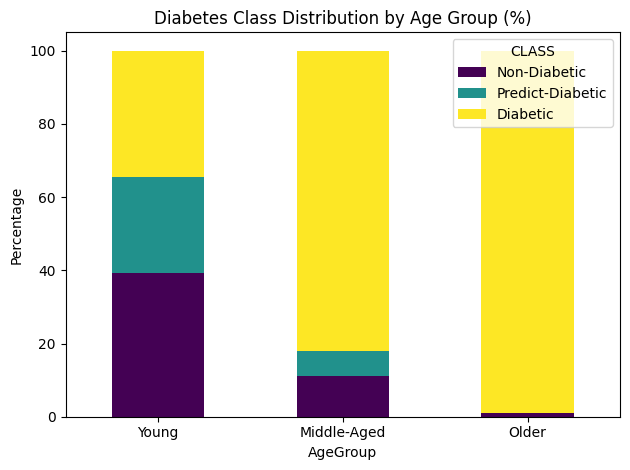

In [ ]:
df_cleaned['AgeGroup'] = pd.cut(df_cleaned['AGE'], bins=[0, 0.3, 0.6, 1.0], labels=['Young', 'Middle-Aged', 'Older'])
age_dist = df_cleaned.groupby(['AgeGroup', 'CLASS']).size().unstack().fillna(0)
age_dist_pct = age_dist.div(age_dist.sum(axis=1), axis=0) * 100

age_dist_pct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Diabetes Class Distribution by Age Group (%)")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title='CLASS', labels=['Non-Diabetic', 'Predict-Diabetic', 'Diabetic'])
plt.tight_layout()
plt.show()